# 0.9_ss_chap6_init_compare_mnist
- activationの中身をmnistで見ていく

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
from src import utils
import itertools
import logging
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
from collections import OrderedDict
%matplotlib inline

In [7]:
from src.ch06.weight_init_compare import main
from src.dataset.mnist import load_mnist
from src.common.util import smooth_curve
from src.common.multi_layer_net import MultiLayerNet
from src.common.optimizer import SGD

In [4]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

## From init compare mnist

2018-11-19 08:28:37,151 - src.ch06.weight_init_compare - INFO - # 0:MNISTデータの読み込み==========
2018-11-19 08:28:37,430 - src.ch06.weight_init_compare - INFO - # 1:実験の設定==========
2018-11-19 08:28:37,466 - src.ch06.weight_init_compare - INFO - # 2:訓練の開始==========


std=0.01:2.302405631543714
Xavier:2.3046325343329546
He:2.3207866819871192
std=0.01:2.3025019282655808
Xavier:2.2669037695142196
He:1.7605181540150503
std=0.01:2.3015530266105766
Xavier:2.205533346276054
He:0.8450330922595545
std=0.01:2.3025040257892724
Xavier:2.0112082550038277
He:0.5017207318960231
std=0.01:2.2993279481620092
Xavier:1.4622970157899569
He:0.4206739860363734
std=0.01:2.301074153122048
Xavier:0.975780557300671
He:0.3960298622274917
std=0.01:2.3028513649313176
Xavier:0.6701508851315876
He:0.284723502502012
std=0.01:2.300013575284491
Xavier:0.6271028507584018
He:0.38631085352358907
std=0.01:2.297495172983046
Xavier:0.569045649915612
He:0.42553277645705595
std=0.01:2.301775848927958
Xavier:0.590734839677127
He:0.37956053083931135
std=0.01:2.3021315783378844
Xavier:0.5081311526188953
He:0.3951971137280583
std=0.01:2.299665987535514
Xavier:0.3573800979958083
He:0.27760191579871163
std=0.01:2.300045172902362
Xavier:0.3094595940725472
He:0.18638188556921986
std=0.01:2.29781757

2018-11-19 08:29:09,514 - src.ch06.weight_init_compare - INFO - # 3.グラフの描画==========


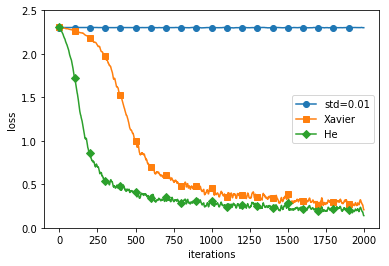

In [6]:
main()

## 自分で書く

In [31]:
weight_init_types = {'std=0.01': 0.01,
                    'Xavier': 'sigmoid',
                    'He': 'relu'}

optimizer = SGD(lr=0.01)

In [11]:
logger.info("# 0:MNISTデータの読み込み==========")
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

2018-11-19 08:51:47,643 - root - INFO - # 0:MNISTデータの読み込み==========


In [15]:
logger.info("# 1:実験の設定==========")
weight_type = 0.01
key = 'std=0.01'

2018-11-19 08:54:19,986 - root - INFO - # 1:実験の設定==========


In [17]:
input_size = 784
hidden_size_list = [100, 100, 100, 100]
output_size = 10

In [28]:
train_loss = []

In [18]:
# 初期化
network = MultiLayerNet(input_size=input_size,
                        hidden_size_list=hidden_size_list, 
                        output_size=output_size, 
                        weight_init_std=weight_type)

In [19]:
logger.info("# 2:訓練の開始==========")

2018-11-19 08:55:27,113 - root - INFO - # 2:訓練の開始==========


In [22]:
# Iterations
# with tqdm
# for i in range(max_iterations):
i = 0

In [24]:
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [25]:
grads = network.gradient(x_batch, t_batch)

In [26]:
optimizer.update(network.params, grads)

In [27]:
loss = network.loss(x_batch, t_batch)

In [29]:
train_loss.append(loss)